### Grafico la curva de abundance matching

In [1]:
import numpy as np
subh = np.loadtxt('../_data/subhalos.dat')

halo_mask, = np.where((subh[:,15]==0) & (subh[:,16]==0))

subh_name = subh[:,0][halo_mask]
subh_ind  = np.int_(subh_name)
# nsubh = len(subh_name)

print(subh_ind)

[ 0  1  3  4  5  6  7  9 20 21 22 27 28 31 33 35 36 37 38 39 41 42 45 46
 49 50 51 53 54 64 65 66 69 73 74 79 84 85 87 88 90 91 92 95 96]


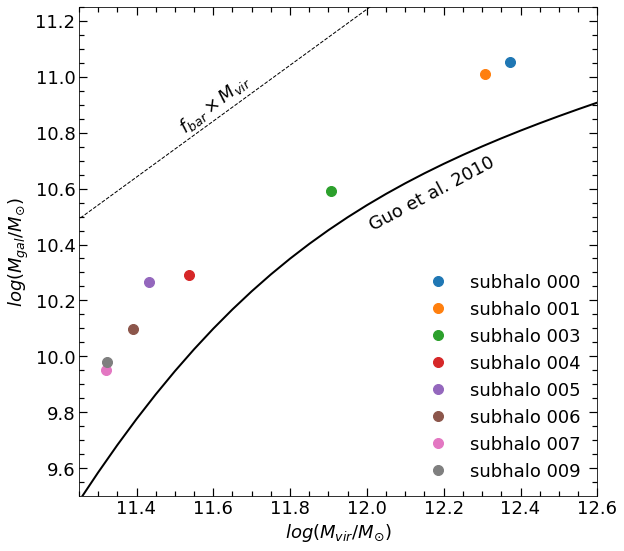

In [44]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import gc
import time_conversion as time
import random

G = 4.299e-6

#-----------------CURVA DE GOU-----------------------------
c = 0.129
M0 = 10**11.4
alpha = 0.926
beta = 0.261
gamma = 2.440
MM = np.arange(11,13,0.05)
M_vir = 10**MM

#------------------curva de Guo et al 2010-------------------
c1 = (M_vir/M0)**(-alpha)
c2 = (M_vir/M0)**beta
M_estrella = M_vir * c * ((c1+c2)**(-gamma))

Me=np.log10(M_estrella)

#-------fraccion de bariones universal--------------------
MM1 = np.arange(11, 13, 0.05)
fbar = 0.0418/0.24
Mbar = fbar * 10**MM1
#--------------------------------------------------

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.08, right = 0.98, top = 0.95,hspace=0.05)


path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:8]:
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    R200 = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    sft  = snap['/Str/FormationTime'][()]

    pgas = snap['/Gas/Coordinates'][()]
    mgas = snap['/Gas/Masses'][()]

    pdrk = snap['/Drk/Coordinates'][()]
    mdrk = snap['/Drk/Masses'][()]

    amask, = np.where(sft>0)#aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    emask, = np.where(sft<0)
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = pgas[:,0]*aexp/h
    ygas = pgas[:,1]*aexp/h
    zgas = pgas[:,2]*aexp/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = pdrk[:,0]*aexp/h
    ydrk = pdrk[:,1]*aexp/h
    zdrk = pdrk[:,2]*aexp/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h
    mgas = mgas*1e10/h
    mdrk = mdrk*1e10/h
    
    rgal = 0.15*R200

    limit_str   = np.where(rstr<rgal)
    Mstr = np.sum((mstr[limit_str]))
   
    rtot = np.concatenate([rstr, rgas, rdrk])
    mtot = np.concatenate([mstr, mgas, mdrk])

    limit_tot   = np.where(rtot<R200)
    Mtot = np.sum((mtot[limit_tot]))
#---------------------------------------------------------
    ax.plot(np.log10(Mtot), np.log10(Mstr),'o',markersize = 10, label='subhalo '+str('%03d'%j))

ax.plot(MM, Me, color='k', lw=2)
ax.plot(MM1, np.log10(Mbar),'--', lw=1, color ='k')
ax.set_ylim(9.5,11.25)
ax.set_xlim(11.25,12.6)
ax.minorticks_on()
ax.tick_params( labelsize=18)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
ax.set_xlabel(r'$log(M_{vir}/M_{\odot})$', fontsize=18)
ax.set_ylabel(r'$log(M_{gal}/M_{\odot})$', fontsize=18)
ax.text(11.5,10.8, r'$f_{bar} \times M_{vir}$', rotation=38, fontsize=18)
ax.text(12,10.45, 'Guo et al. 2010', rotation=28, fontsize=18)
ax.legend(frameon=False, fontsize=18)

fig.savefig('../_imagenes/Mvir_vs_Mgal.png', dpi = 100)
plt.show()

#### Checkeo cuanta masa de particulas con tiempo de formacion<0 hay 

In [20]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import gc
import time_conversion as time
import random

G = 4.299e-6

path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:8]:

    print('subhalo', str('%03d'%j))
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    R200 = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    sft  = snap['/Str/FormationTime'][()]

    pgas = snap['/Gas/Coordinates'][()]
    mgas = snap['/Gas/Masses'][()]

    pdrk = snap['/Drk/Coordinates'][()]
    mdrk = snap['/Drk/Masses'][()]

    amask, = np.where(sft>0)#aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    emask, = np.where(sft<0)
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[:,0]*aexp/h
    ystr = pstr[:,1]*aexp/h
    zstr = pstr[:,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = pgas[:,0]*aexp/h
    ygas = pgas[:,1]*aexp/h
    zgas = pgas[:,2]*aexp/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = pdrk[:,0]*aexp/h
    ydrk = pdrk[:,1]*aexp/h
    zdrk = pdrk[:,2]*aexp/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
    #----------------------masas----------------------------
    
    limit, = np.where(rstr<R200)
    
    Mass_total = np.sum(mstr[limit]*1e10)
    print('Total', '%1.2e'%Mass_total)
    
    limit2, = np.where(rstr[amask]<R200)
    Mass_recortada = np.sum(mstr[amask][limit2]*1e10)
    print('Recortada', '%1.2e'%Mass_recortada)
    print('Cociente', Mass_recortada/Mass_total)
    print('-----------------------')
    
    

subhalo 000
Total 8.91e+10
Recortada 8.77e+10
Cociente 0.9840627
-----------------------
subhalo 001
Total 8.00e+10
Recortada 7.98e+10
Cociente 0.99729896
-----------------------
subhalo 003
Total 3.02e+10
Recortada 2.99e+10
Cociente 0.9900762
-----------------------
subhalo 004
Total 1.38e+10
Recortada 1.36e+10
Cociente 0.98691565
-----------------------
subhalo 005
Total 1.30e+10
Recortada 1.28e+10
Cociente 0.98528904
-----------------------
subhalo 006
Total 9.00e+09
Recortada 8.87e+09
Cociente 0.9860967
-----------------------
subhalo 007
Total 6.83e+09
Recortada 6.53e+09
Cociente 0.95539737
-----------------------
subhalo 009
Total 7.05e+09
Recortada 6.73e+09
Cociente 0.955382
-----------------------
